In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [66]:
df.head(40)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [67]:
df.shape

(1000, 40)

In [68]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [69]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [70]:
## remove the LAST COLUMN

In [71]:
df=df.drop(['_c39','policy_bind_date'],axis=1)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [72]:
df=df.drop(['incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','policy_number'],axis=1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,YES,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,?,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,?,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,NO,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,YES,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,YES,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,?,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,?,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [73]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,YES,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,?,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,?,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,NO,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,YES,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,YES,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,?,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,?,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [74]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [75]:
# Checking number of unique values in each columns
count = 1
for x in df:
    print(f'{count}. {x}: {df[x].nunique()}')
    print(f'{df[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. months_as_customer: 391
194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
----------

2. age: 46
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
----------

3. policy_state: 3
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----------

4. policy_csl: 3
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
----------

5. policy_deductable: 3
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
----------

6. policy_annual_premium: 991
1215.36

In [76]:
## extracting the continuous features

In [77]:
cont_data = df.select_dtypes(exclude = ['object'] )
cont_data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,35100,0,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,48900,-62400,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,66000,-46000,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,108480,18080,18080,72320,2015
997,130,34,500,1383.49,3000000,442797,35100,0,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,5000000,441714,0,0,46980,5220,5220,36540,1998


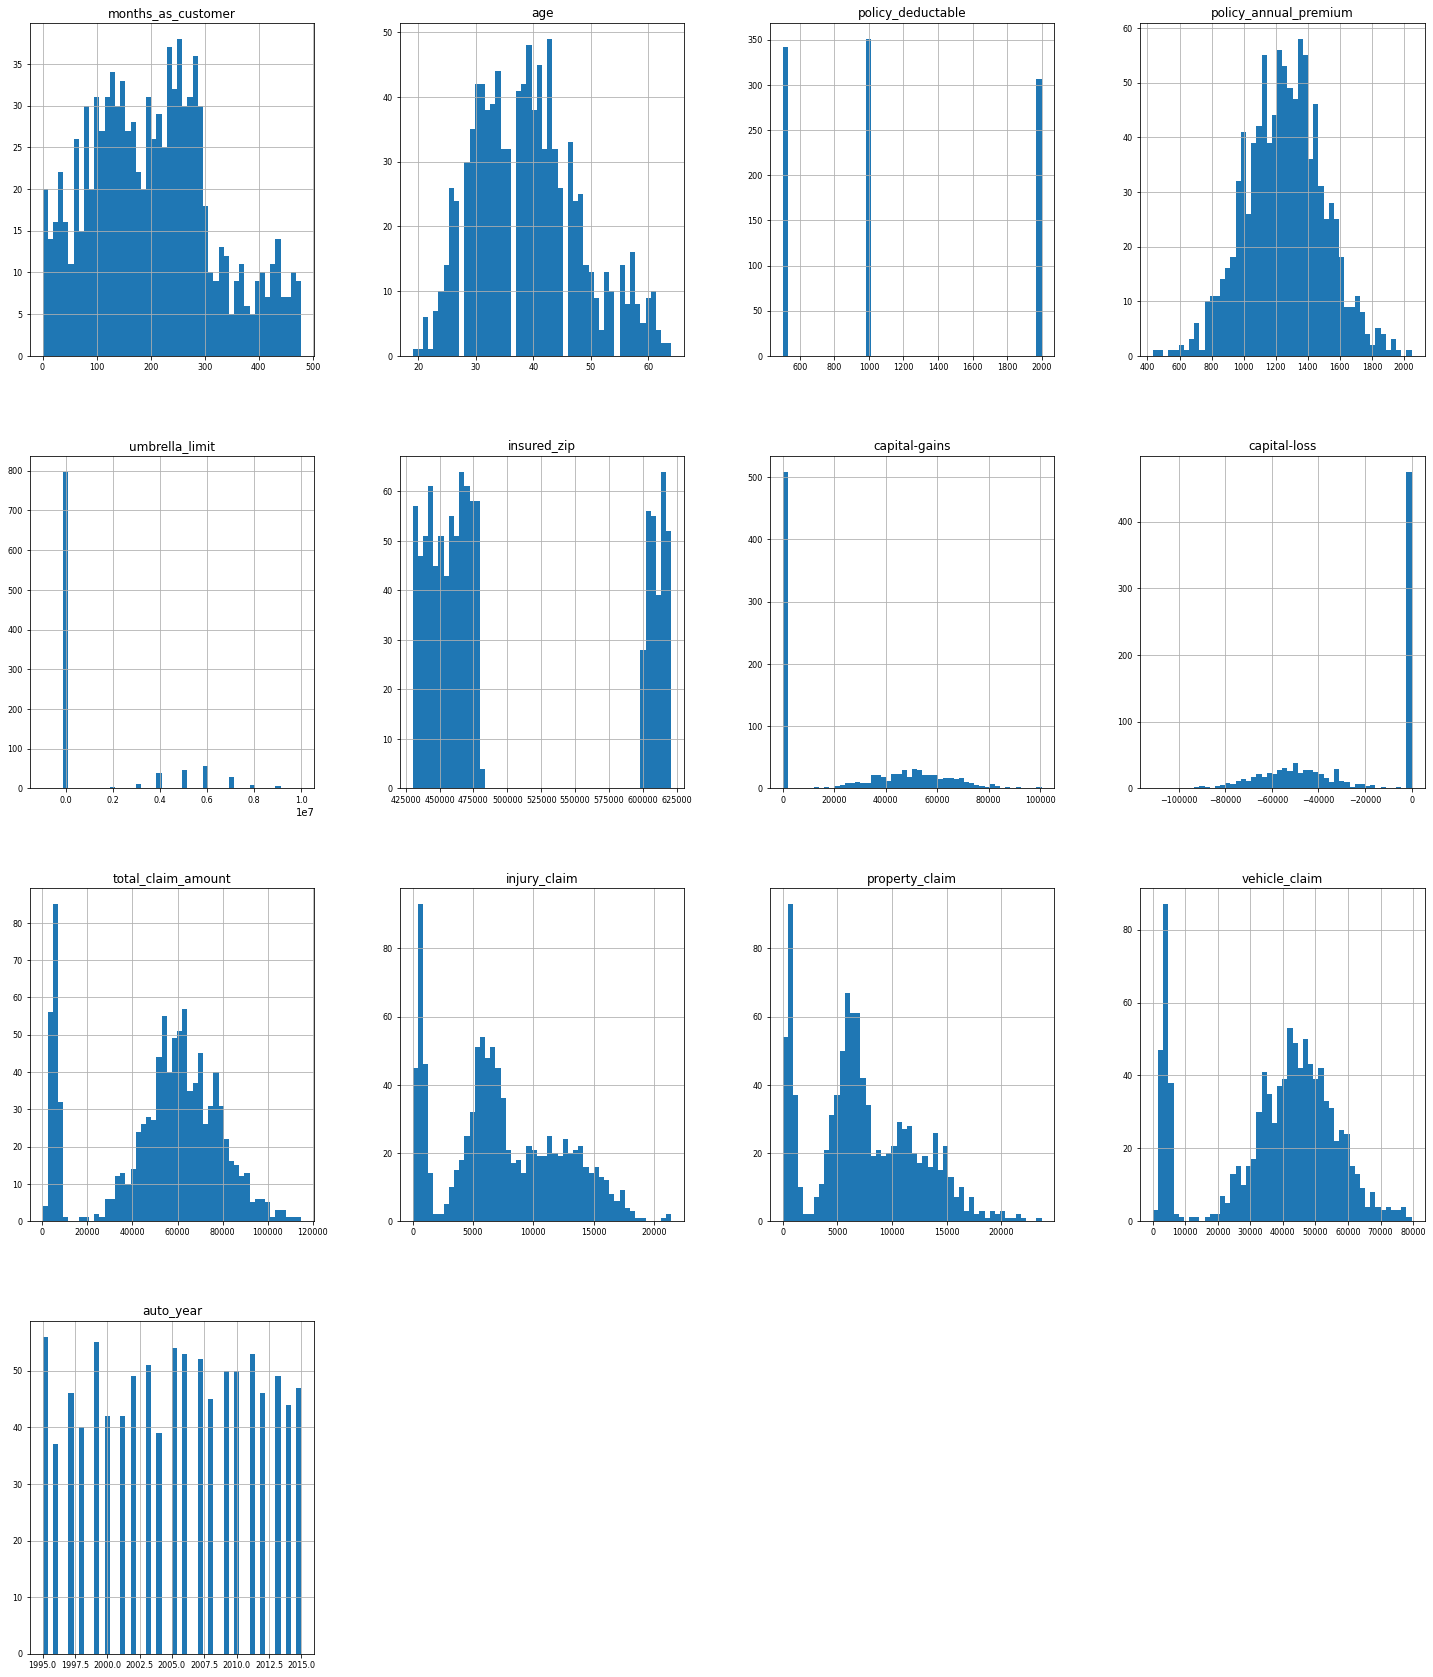

In [78]:
cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

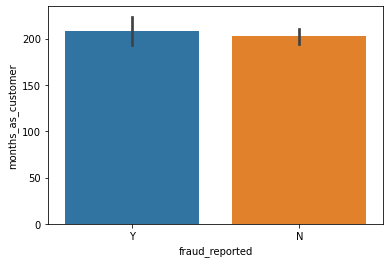

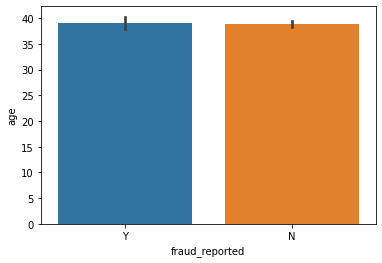

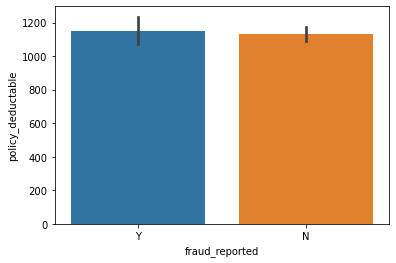

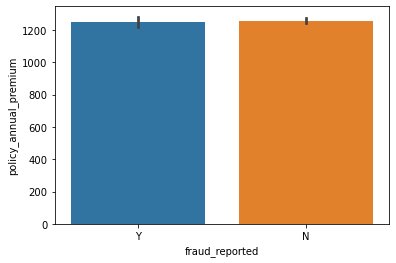

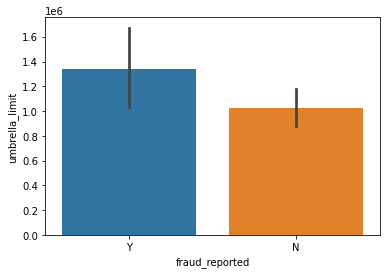

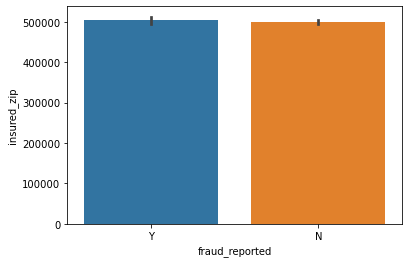

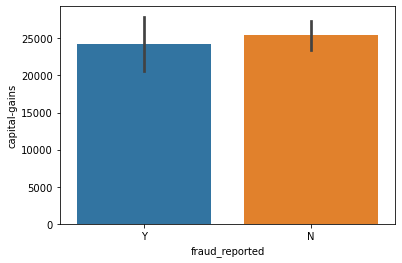

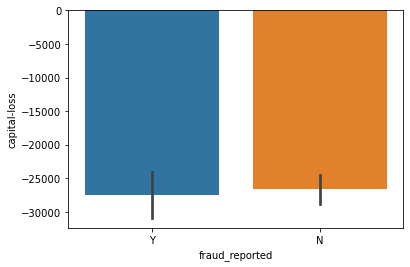

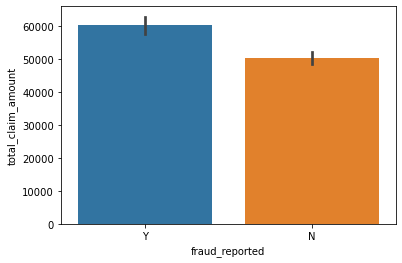

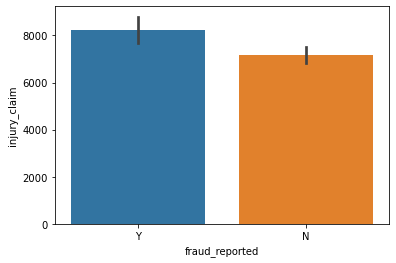

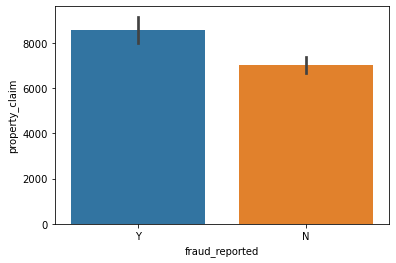

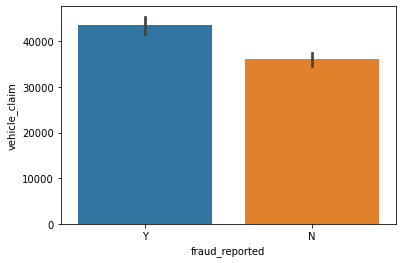

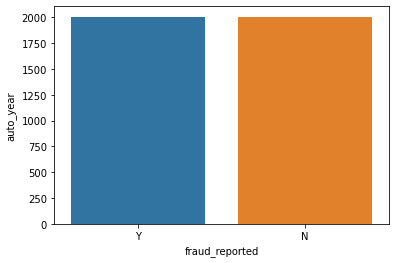

In [79]:
for i in cont_data:
    sns.barplot(y = cont_data[i], x = df['fraud_reported'])
    plt.show()

In [80]:
## checking for outliers

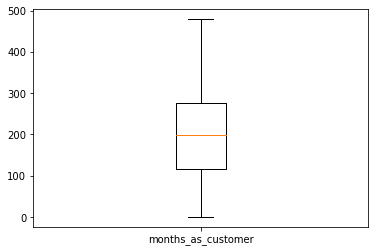

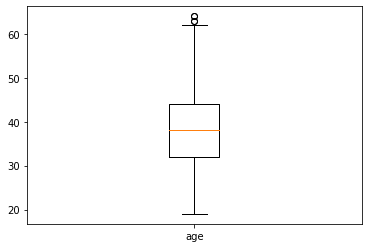

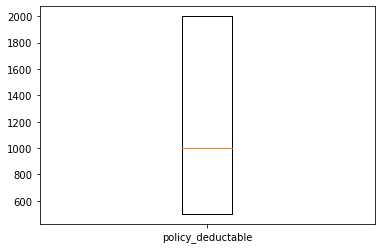

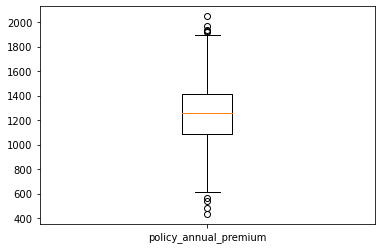

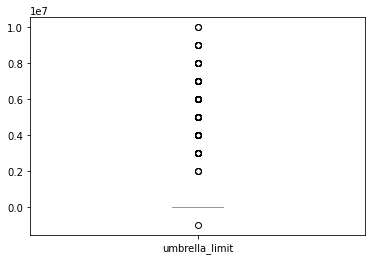

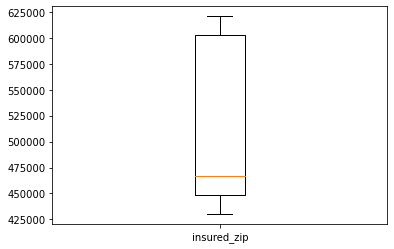

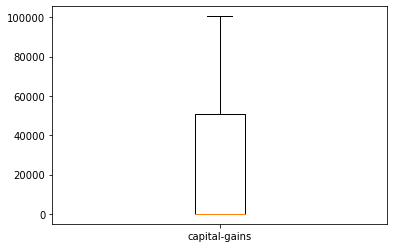

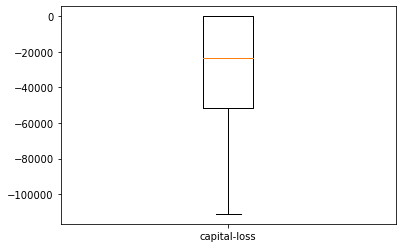

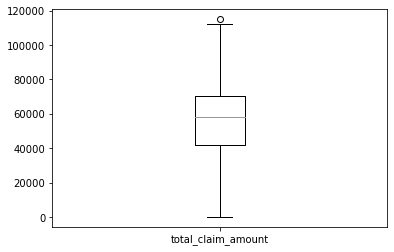

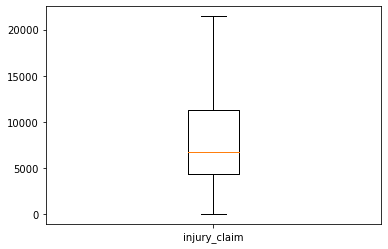

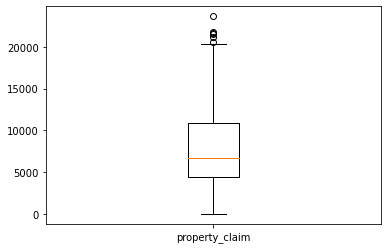

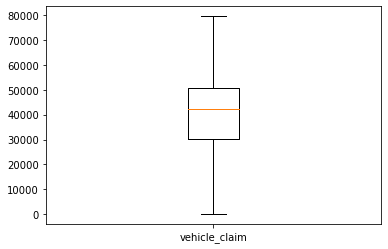

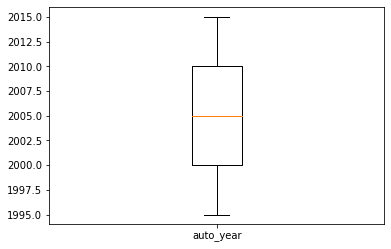

In [81]:
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [82]:
a=['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']

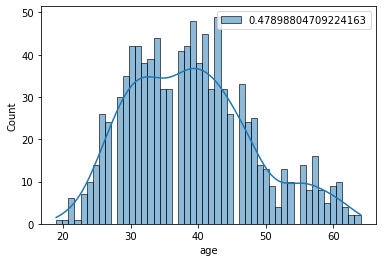

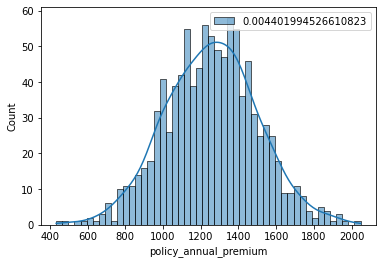

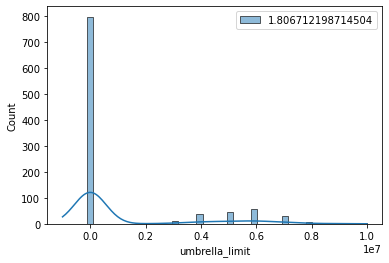

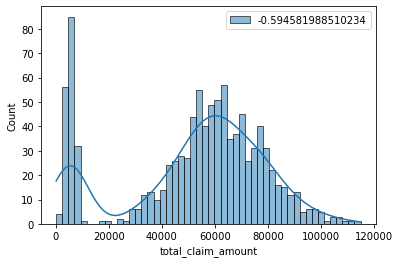

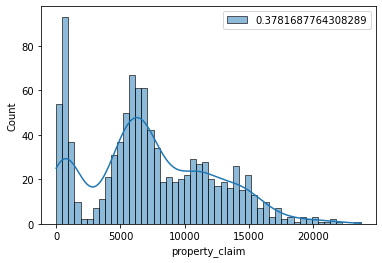

In [83]:
for i in a:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [85]:
out_vars=['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']

In [86]:
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

In [87]:
cont_data.loc[:, out_vars] = cont_data.loc[:, out_vars].apply(outlierTreat)
cont_data.loc[:, out_vars]

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim
0,48,1406.91,0,71610.0,13020
1,42,1197.22,0,5070.0,780
2,29,1413.14,0,34650.0,3850
3,41,1415.74,0,63400.0,6340
4,44,1583.91,0,6500.0,650
...,...,...,...,...,...
995,38,1310.80,0,87200.0,8720
996,41,1436.79,0,108480.0,18080
997,34,1383.49,0,67500.0,7500
998,62,1356.92,0,46980.0,5220


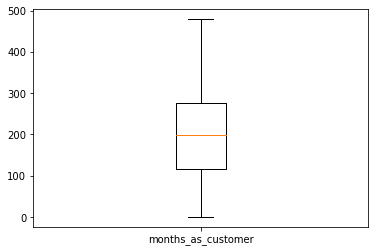

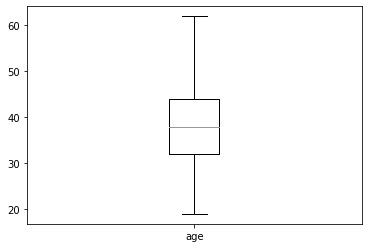

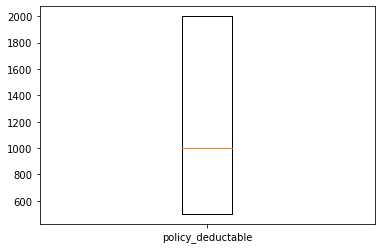

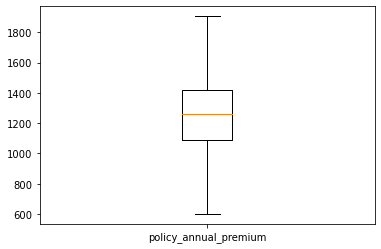

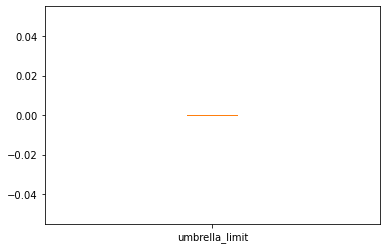

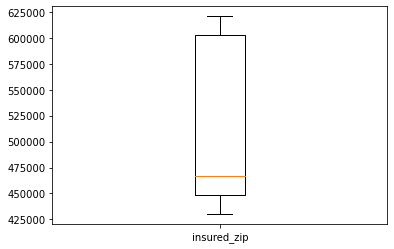

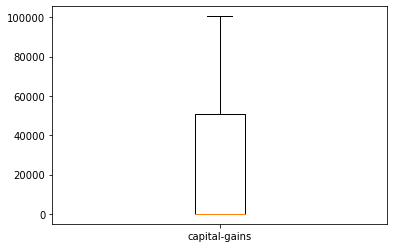

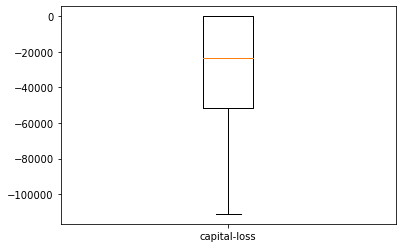

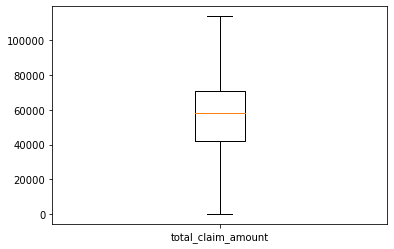

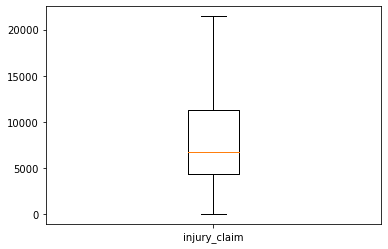

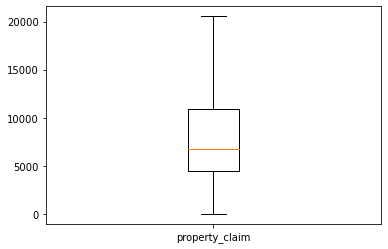

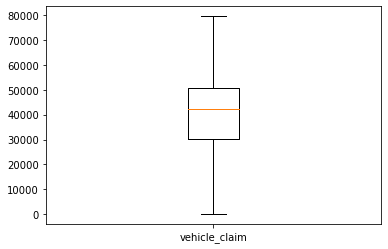

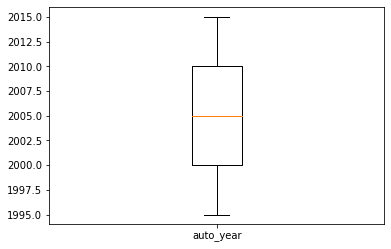

In [88]:
# Using box plot for checking the presence of outliers.
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

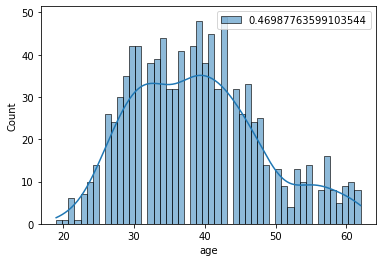

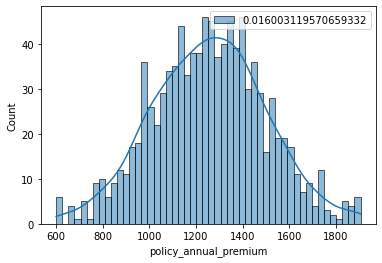

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


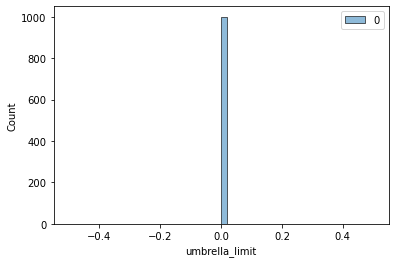

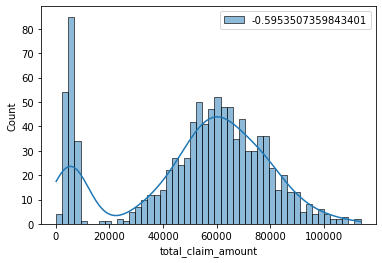

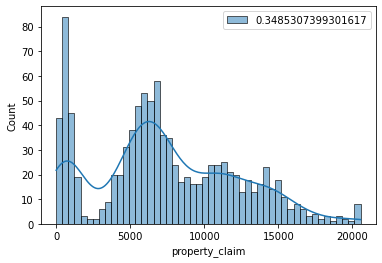

In [90]:
for i in out_vars:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [92]:
cont_data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,71610.0,6510,13020,52080,2004
1,228,42,2000,1197.22,0,468176,0,0,5070.0,780,780,3510,2007
2,134,29,2000,1413.14,0,430632,35100,0,34650.0,7700,3850,23100,2007
3,256,41,2000,1415.74,0,608117,48900,-62400,63400.0,6340,6340,50720,2014
4,228,44,1000,1583.91,0,610706,66000,-46000,6500.0,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,87200.0,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,108480.0,18080,18080,72320,2015
997,130,34,500,1383.49,0,442797,35100,0,67500.0,7500,7500,52500,1996
998,458,62,2000,1356.92,0,441714,0,0,46980.0,5220,5220,36540,1998


<AxesSubplot:>

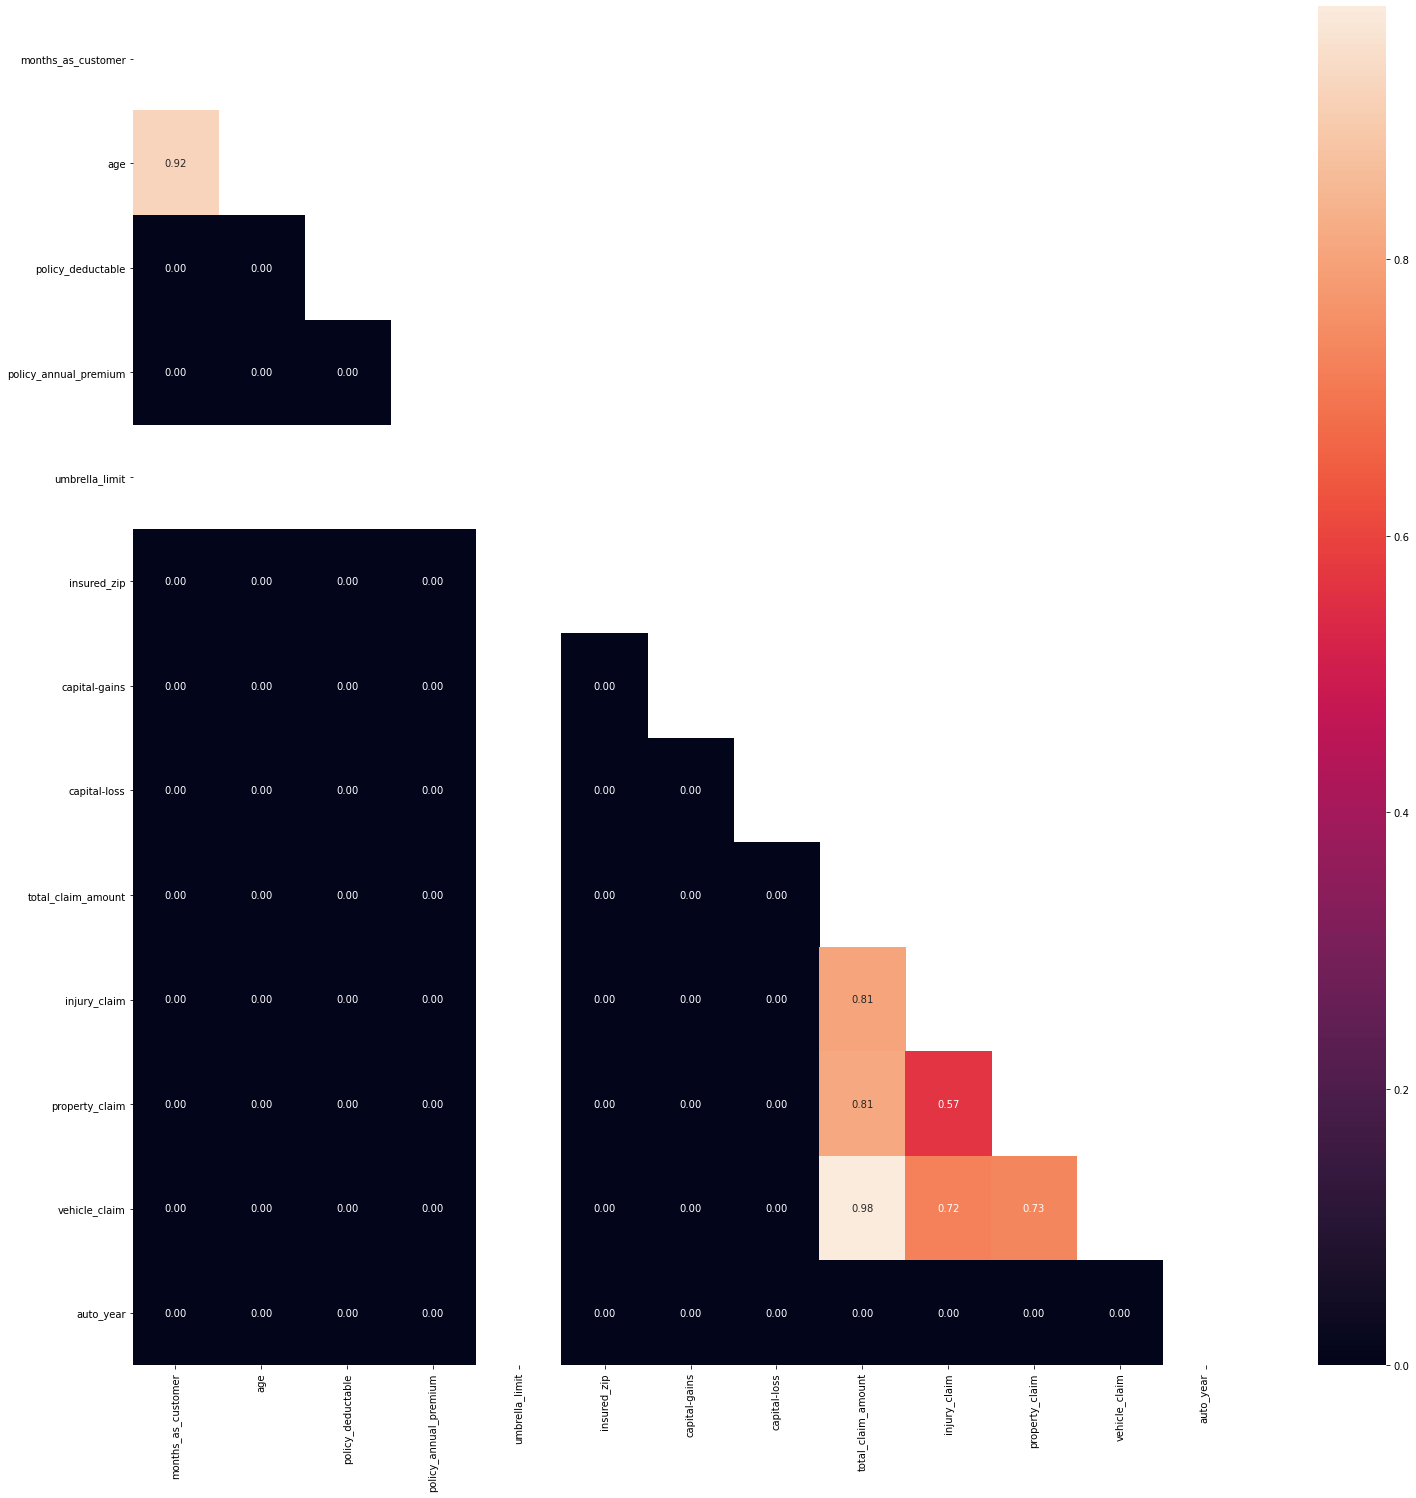

In [91]:
# Finding the correlation.
corr = cont_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

In [93]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                return col_corr

In [95]:
corr_features=correlation(cont_data,0.7)
len(set(corr_features))

1

In [96]:
corr_features

{'age'}

In [97]:
cont_data.drop(['age'],axis=1)

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,1000,1406.91,0,466132,53300,0,71610.0,6510,13020,52080,2004
1,228,2000,1197.22,0,468176,0,0,5070.0,780,780,3510,2007
2,134,2000,1413.14,0,430632,35100,0,34650.0,7700,3850,23100,2007
3,256,2000,1415.74,0,608117,48900,-62400,63400.0,6340,6340,50720,2014
4,228,1000,1583.91,0,610706,66000,-46000,6500.0,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,431289,0,0,87200.0,17440,8720,61040,2006
996,285,1000,1436.79,0,608177,70900,0,108480.0,18080,18080,72320,2015
997,130,500,1383.49,0,442797,35100,0,67500.0,7500,7500,52500,1996
998,458,2000,1356.92,0,441714,0,0,46980.0,5220,5220,36540,1998


In [98]:
## exploring the categorical variable

In [99]:
cat_vars = df.select_dtypes(include = ['object'])
cat_vars

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,?,Honda,Accord,N
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,?,Volkswagen,Passat,N
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,?,YES,Suburu,Impreza,N
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,?,YES,Audi,A5,N


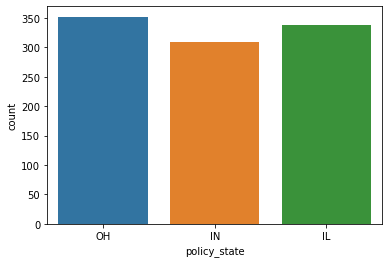

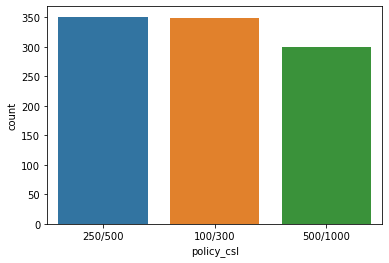

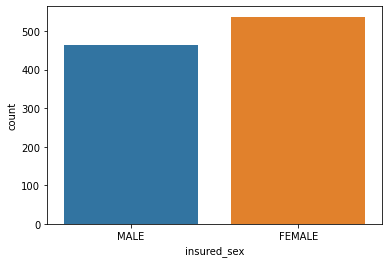

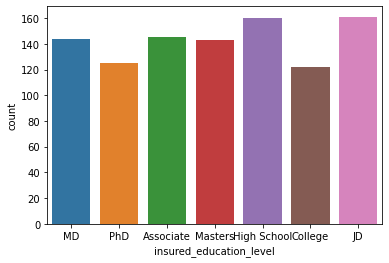

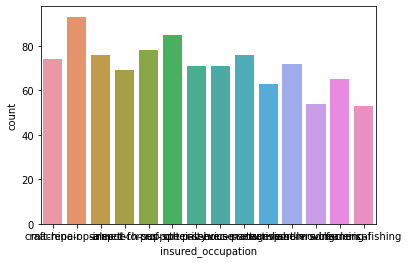

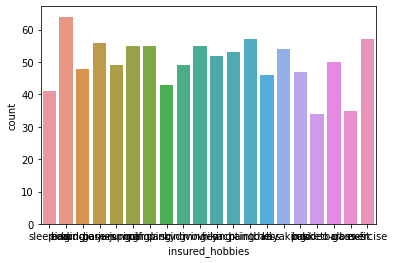

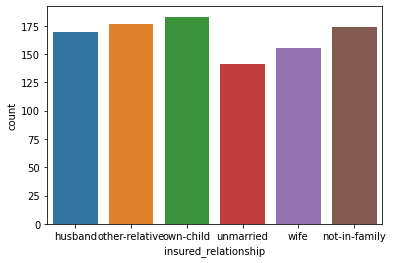

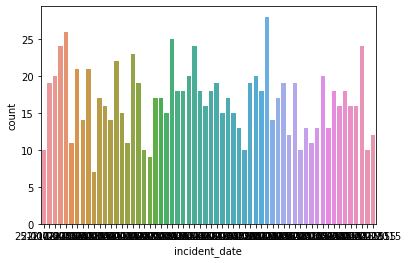

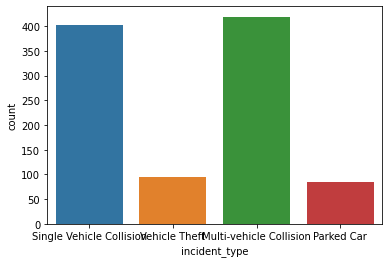

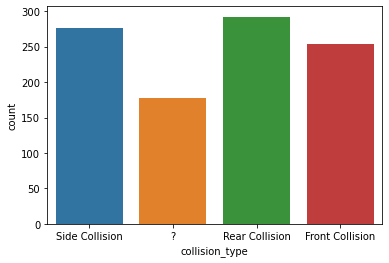

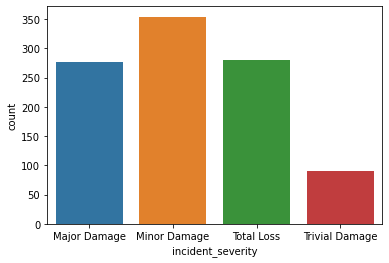

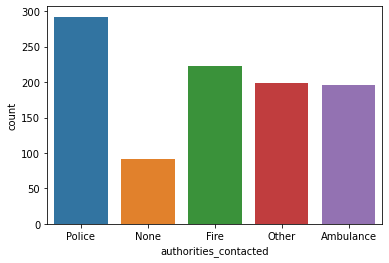

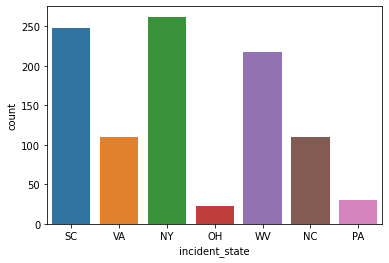

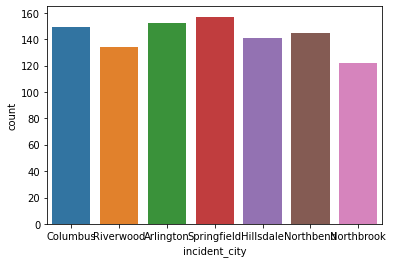

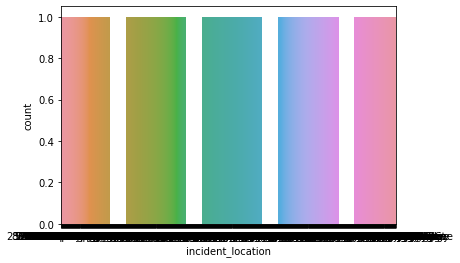

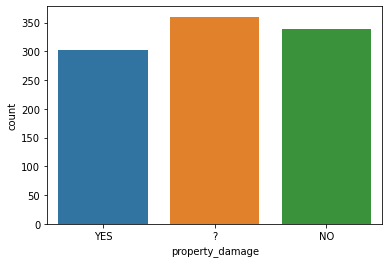

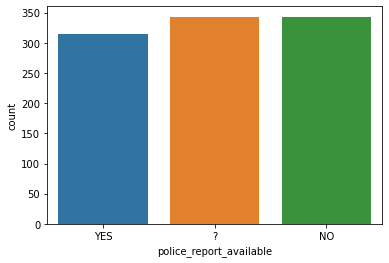

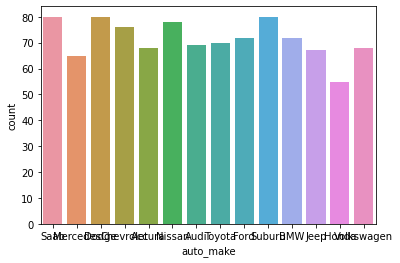

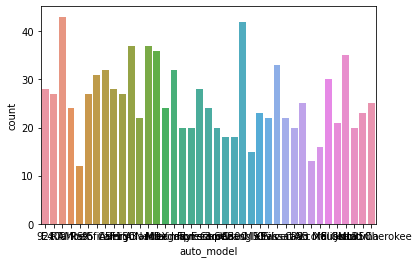

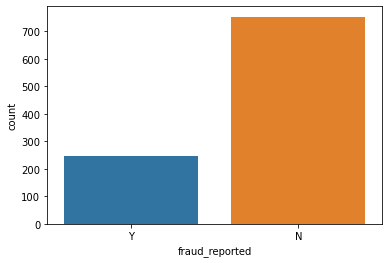

In [100]:
# Looking at the data distribution for different values.
plt.rcParams['figure.figsize'] = (6, 4)
for i in cat_vars:
    sns.countplot(x = cat_vars[i])
    plt.show()

In [101]:
# Count values of different values for each variables.
for i in cat_vars:
    print(cat_vars[i].value_counts(), end = '\n---------\n\n')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
---------

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
---------

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
---------

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
---------

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
---------

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hi

In [102]:
cat_vars=cat_vars.drop(['incident_date'],axis=1)
cat_vars

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,?,Honda,Accord,N
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,?,Volkswagen,Passat,N
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,?,YES,Suburu,Impreza,N
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,?,YES,Audi,A5,N


In [103]:
# Count values of different values for each variables.
for i in cat_vars:
    print(cat_vars[i].value_counts(), end = '\n---------\n\n')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
---------

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
---------

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
---------

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
---------

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
---------

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hi

In [105]:
##

In [107]:
cat_vars['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [108]:
## we can use the ordinal encoding 

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
lab_enc=LabelEncoder()

In [111]:
df2=lab_enc.fit_transform(cat_vars['policy_state'])

In [197]:
pd.Series(df2)
cat_vars['policy_state']=df2
df2

array([2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0,
       1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [116]:
cat_vars['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
lab_enc=LabelEncoder()

In [119]:
df3=lab_enc.fit_transform(cat_vars['policy_csl'])

In [198]:
pd.Series(df3)
cat_vars['policy_state']=df3
df3

array([2, 3, 0, 2, 3, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 1, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 3, 2, 0, 3, 3, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 3, 3, 3, 0, 0, 0, 2,
       1, 0, 0, 2, 1, 0, 0, 3, 2, 0, 1, 3, 2, 2, 0, 1, 0, 3, 0, 0, 2, 0,
       2, 2, 0, 0, 3, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 2, 2, 2, 3, 0, 0, 0, 2, 3, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 0, 3, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 3, 2,
       2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 0, 3, 0, 2, 1, 2, 2, 3, 0, 0, 3, 1,
       2, 3, 3, 2, 1, 0, 0, 2, 2, 0, 0, 1, 3, 3, 0, 0, 2, 0, 2, 3, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       1, 0, 3, 2, 2, 0, 1, 2, 0, 0, 3, 2, 0, 0, 0, 2, 3, 0, 1, 2, 0, 0,
       2, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 2, 0, 2,
       0, 3, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 3,

In [121]:
cat_vars['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
lab_enc=LabelEncoder()

In [125]:
df4=lab_enc.fit_transform(cat_vars['insured_sex'])

In [199]:
pd.Series(df4)
cat_vars['policy_state']=df4
df4

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [129]:
cat_vars['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [130]:
insured_occupation=cat_vars[["insured_occupation"]]

In [131]:
insured_occupation=pd.get_dummies(insured_occupation,drop_first=True)

In [132]:
insured_occupation.head()

,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


In [137]:
 insured_relationship=cat_vars[["insured_relationship"]]

In [138]:
insured_relationship=pd.get_dummies(insured_relationship,drop_first=True)

In [139]:
insured_relationship.head()

,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [140]:
incident_type=cat_vars[["incident_type"]]

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
lab_enc=LabelEncoder()

In [144]:
df5=lab_enc.fit_transform(cat_vars['incident_type'])


In [200]:
pd.Series(df5)
cat_vars['incident_type']=df5
df5

array([3, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 3, 2, 3, 3, 3, 2, 3,
       2, 1, 2, 2, 0, 0, 3, 2, 3, 3, 1, 1, 3, 1, 2, 0, 2, 1, 2, 3, 3, 2,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 3, 0, 2, 1, 0, 1, 3, 2, 3, 3, 1, 2, 1,
       3, 3, 1, 0, 3, 1, 2, 2, 3, 1, 1, 1, 0, 2, 3, 0, 0, 0, 3, 1, 1, 3,
       0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 0, 0, 2, 3, 1, 0, 3, 0, 2, 1, 1, 2,
       2, 1, 2, 3, 0, 3, 2, 3, 2, 2, 3, 1, 1, 1, 2, 2, 3, 0, 1, 1, 1, 1,
       1, 3, 3, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 3, 1, 2, 3, 3, 2, 2, 2,
       2, 1, 2, 0, 1, 0, 0, 1, 3, 1, 2, 3, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 1, 0, 3, 3, 3, 2, 1, 1, 1, 0, 2, 2, 0, 3, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 2, 0, 2, 2, 2, 2, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 0, 2, 3,
       1, 1, 3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 1, 1, 1,
       0, 2, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 2, 0, 1, 2, 3,
       3, 0, 3, 2, 2, 1, 2, 0, 1, 2, 1, 1, 3, 2, 3, 3, 3, 0, 0, 2, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 3, 2, 3, 1, 0, 0, 2, 0,

In [148]:
df5.shape

(1000,)

In [149]:
cat_vars["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [150]:
lab_enc=LabelEncoder()

In [156]:
df6=lab_enc.fit_transform(cat_vars['collision_type'])

In [201]:
pd.Series(df6)
cat_vars['collision_type']=df6
df6

array([3, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 3, 2, 3, 3, 3, 2, 3,
       2, 1, 2, 2, 0, 0, 3, 2, 3, 3, 1, 1, 3, 1, 2, 0, 2, 1, 2, 3, 3, 2,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 3, 0, 2, 1, 0, 1, 3, 2, 3, 3, 1, 2, 1,
       3, 3, 1, 0, 3, 1, 2, 2, 3, 1, 1, 1, 0, 2, 3, 0, 0, 0, 3, 1, 1, 3,
       0, 3, 1, 3, 0, 1, 2, 0, 3, 2, 0, 0, 2, 3, 1, 0, 3, 0, 2, 1, 1, 2,
       2, 1, 2, 3, 0, 3, 2, 3, 2, 2, 3, 1, 1, 1, 2, 2, 3, 0, 1, 1, 1, 1,
       1, 3, 3, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 3, 1, 2, 3, 3, 2, 2, 2,
       2, 1, 2, 0, 1, 0, 0, 1, 3, 1, 2, 3, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 1, 0, 3, 3, 3, 2, 1, 1, 1, 0, 2, 2, 0, 3, 1, 0, 2, 3, 0, 0,
       1, 0, 0, 2, 0, 2, 2, 2, 2, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 0, 2, 3,
       1, 1, 3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 1, 1, 1,
       0, 2, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 2, 0, 1, 2, 3,
       3, 0, 3, 2, 2, 1, 2, 0, 1, 2, 1, 1, 3, 2, 3, 3, 3, 0, 0, 2, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 3, 2, 3, 1, 0, 0, 2, 0,

In [158]:
cat_vars["incident_state"].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [159]:
lab_enc=LabelEncoder()

In [162]:
df7=lab_enc.fit_transform(cat_vars['incident_state'])

In [202]:
pd.Series(df7)
cat_vars['incident_state']=df7
df7

array([4, 5, 1, 2, 1, 4, 1, 5, 6, 0, 1, 4, 4, 4, 4, 6, 1, 6, 1, 5, 1, 4,
       4, 6, 5, 2, 3, 5, 4, 4, 4, 6, 1, 1, 6, 6, 1, 6, 1, 0, 6, 6, 4, 0,
       4, 1, 0, 6, 1, 6, 1, 1, 6, 0, 5, 1, 4, 5, 6, 5, 1, 2, 6, 6, 5, 1,
       4, 6, 6, 0, 4, 6, 0, 4, 5, 4, 1, 6, 4, 4, 0, 0, 1, 5, 1, 1, 4, 5,
       6, 4, 4, 1, 6, 0, 4, 2, 5, 4, 6, 0, 4, 6, 0, 6, 4, 6, 5, 6, 1, 1,
       4, 0, 6, 5, 5, 1, 4, 1, 1, 1, 4, 1, 5, 0, 6, 1, 6, 3, 1, 4, 1, 6,
       0, 6, 6, 1, 5, 4, 0, 5, 1, 4, 4, 4, 6, 0, 0, 6, 4, 4, 1, 0, 1, 6,
       0, 1, 1, 6, 6, 1, 5, 4, 1, 4, 3, 6, 6, 1, 4, 1, 1, 3, 4, 3, 6, 3,
       2, 4, 6, 1, 5, 4, 5, 4, 1, 1, 0, 1, 6, 5, 4, 4, 4, 5, 5, 0, 6, 6,
       1, 4, 1, 6, 1, 4, 6, 4, 4, 5, 4, 6, 0, 2, 1, 4, 0, 0, 1, 0, 6, 4,
       1, 1, 1, 1, 5, 1, 1, 1, 6, 4, 1, 4, 6, 2, 3, 1, 1, 4, 1, 6, 4, 5,
       4, 1, 3, 1, 1, 4, 4, 0, 4, 4, 6, 2, 4, 1, 4, 4, 1, 4, 4, 0, 1, 4,
       4, 0, 3, 4, 3, 4, 5, 1, 6, 1, 1, 4, 6, 3, 6, 4, 3, 1, 4, 6, 6, 5,
       4, 4, 4, 5, 0, 2, 0, 1, 0, 4, 3, 4, 6, 3, 4,

In [203]:
cat_vars['property_damage'].value_counts()

0    360
1    338
2    302
Name: property_damage, dtype: int64

In [166]:
lab_enc=LabelEncoder()

In [167]:
df8=lab_enc.fit_transform(cat_vars['property_damage'])

In [204]:
pd.Series(df8)
cat_vars['property_damage']=df8
df8

array([2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1,
       2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0,
       1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2,
       2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1,

In [169]:
cat_vars['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [170]:
lab_enc=LabelEncoder()

In [171]:
df9=lab_enc.fit_transform(cat_vars['police_report_available'])

In [196]:
pd.Series(df9)
cat_vars['police_report_available']=df9
df9

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [174]:
cat_vars['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [175]:
 auto_make=cat_vars['auto_make']

In [177]:
auto_make=pd.get_dummies(auto_make,drop_first=True)
auto_make

,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,0,1,0,0
998,1,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
auto_model=cat_vars['auto_model']

In [179]:
auto_model=pd.get_dummies(auto_model,drop_first=True)
auto_model

,92x,93,95,A3,A5,Accord,C300,CRV,Camry,Civic,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
lab_enc=LabelEncoder()

In [183]:
df_10=lab_enc.fit_transform(cat_vars['fraud_reported'])

In [219]:
pd.Series(df_10)
cat_vars['fraud_reported']=df_10
df_10

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [185]:
## concatenate dataframe

In [208]:
cat_vars_new=pd.concat([insured_occupation,insured_relationship,auto_make,auto_model],axis=1)
cat_vars_new.head()

,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [212]:
# Combining Numerical and Categorical data.
final_data = pd.concat([cont_data, cat_vars_new], axis = 1)
final_data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,328,48,1000,1406.91,0,466132,53300,0,71610.0,6510,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,0,468176,0,0,5070.0,780,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,0,430632,35100,0,34650.0,7700,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,0,608117,48900,-62400,63400.0,6340,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,0,610706,66000,-46000,6500.0,1300,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,87200.0,17440,...,0,0,0,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,608177,70900,0,108480.0,18080,...,0,0,0,0,0,0,0,0,0,0
997,130,34,500,1383.49,0,442797,35100,0,67500.0,7500,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,1356.92,0,441714,0,0,46980.0,5220,...,0,0,0,0,0,0,0,0,0,0


In [215]:
x=final_data

In [216]:
x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,328,48,1000,1406.91,0,466132,53300,0,71610.0,6510,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,0,468176,0,0,5070.0,780,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,0,430632,35100,0,34650.0,7700,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,0,608117,48900,-62400,63400.0,6340,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,0,610706,66000,-46000,6500.0,1300,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,87200.0,17440,...,0,0,0,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,608177,70900,0,108480.0,18080,...,0,0,0,0,0,0,0,0,0,0
997,130,34,500,1383.49,0,442797,35100,0,67500.0,7500,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,1356.92,0,441714,0,0,46980.0,5220,...,0,0,0,0,0,0,0,0,0,0


In [217]:
y=

In [218]:
y

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [220]:
y=df_10

In [221]:
y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [222]:
y.shape

(1000,)

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
st=StandardScaler()

In [225]:
st.fit_transform(x)

array([[ 1.07813958,  0.99320035, -0.22238259, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [ 0.2089946 ,  0.33530654,  1.41278352, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [-0.60800168, -1.09013003,  1.41278352, ..., -0.20938323,
        -0.15343224, -0.12751534],
       ...,
       [-0.64276748, -0.5418852 , -1.03996564, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [ 2.20802805,  2.52828589,  1.41278352, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [ 2.19064515,  2.30898795, -0.22238259, ..., -0.20938323,
        -0.15343224, -0.12751534]])

In [226]:
from sklearn.model_selection import train_test_split,cross_val_score
#importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

In [229]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [241]:
kn=KNeighborsClassifier()

In [242]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [243]:
y_pred=kn.predict(x_test)

In [244]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [234]:
accuracy_score(y_pred,y_test)

0.6366666666666667

In [245]:
confusion_matrix(y_test,y_pred)

array([[185,  15],
       [ 94,   6]], dtype=int64)

In [246]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.66      0.93      0.77       200\n           1       0.29      0.06      0.10       100\n\n    accuracy                           0.64       300\n   macro avg       0.47      0.49      0.44       300\nweighted avg       0.54      0.64      0.55       300\n'

In [247]:
sv=SVC()

In [248]:
sv.fit(x_train,y_train)

SVC()

In [249]:
y_pred=sv.predict(x_test)

In [250]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [251]:
confusion_matrix(y_test,y_pred)

array([[200,   0],
       [100,   0]], dtype=int64)

In [252]:
classification_report(y_test,y_pred)

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80       200\n           1       0.00      0.00      0.00       100\n\n    accuracy                           0.67       300\n   macro avg       0.33      0.50      0.40       300\nweighted avg       0.44      0.67      0.53       300\n'

In [253]:
## gradient Boosting classifier

In [254]:
gb=GradientBoostingClassifier()

In [255]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [256]:
y_pred=gb.predict(x_test)

In [257]:
accuracy_score(y_test,y_pred)

0.6466666666666666

In [258]:
confusion_matrix(y_test,y_pred)

array([[189,  11],
       [ 95,   5]], dtype=int64)

In [259]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.94      0.78       200\n           1       0.31      0.05      0.09       100\n\n    accuracy                           0.65       300\n   macro avg       0.49      0.50      0.43       300\nweighted avg       0.55      0.65      0.55       300\n'

In [260]:
## randomforest classifier

In [261]:
rf=RandomForestClassifier()

In [262]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [263]:
y_pred=rf.predict(x_test)

In [264]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [265]:
confusion_matrix(y_test,y_pred)

array([[199,   1],
       [ 99,   1]], dtype=int64)

In [266]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.99      0.80       200\n           1       0.50      0.01      0.02       100\n\n    accuracy                           0.67       300\n   macro avg       0.58      0.50      0.41       300\nweighted avg       0.61      0.67      0.54       300\n'

In [268]:
## decision tree classifier

In [269]:
dt=DecisionTreeClassifier()

In [270]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [271]:
y_pred=dt.predict(x_test)

In [272]:
accuracy_score(y_test,y_pred)

0.58

In [273]:
confusion_matrix(y_test,y_pred)

array([[150,  50],
       [ 76,  24]], dtype=int64)

In [275]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.66      0.75      0.70       200\n           1       0.32      0.24      0.28       100\n\n    accuracy                           0.58       300\n   macro avg       0.49      0.49      0.49       300\nweighted avg       0.55      0.58      0.56       300\n'

In [276]:
## ada boost classifier

In [277]:
ad=AdaBoostClassifier()

In [278]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [280]:
y_pred=ad.predict(x_test)

In [282]:
accuracy_score(y_test,y_pred)

0.6733333333333333

In [283]:
confusion_matrix(y_test,y_pred)

array([[191,   9],
       [ 89,  11]], dtype=int64)

In [284]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.68      0.95      0.80       200\n           1       0.55      0.11      0.18       100\n\n    accuracy                           0.67       300\n   macro avg       0.62      0.53      0.49       300\nweighted avg       0.64      0.67      0.59       300\n'

In [285]:
## svc and ada boost working well

In [286]:
## hyperparameter tuning

In [287]:
from sklearn.model_selection import RandomizedSearchCV

In [289]:
params={'C':[0.001,1,2,3,4,5,6,7,8,9,10],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6]}

In [291]:
r=RandomizedSearchCV(SVC(),params)

In [292]:
r.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.001, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                              10],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6]})

In [293]:
r.best_params_

{'gamma': 0.6, 'C': 6}

In [294]:
svc=SVC(C=6,gamma=0.6)

In [295]:
svc.fit(x_train,y_train)

SVC(C=6, gamma=0.6)

In [296]:
y_pred=svc.predict(x_test)

In [297]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [298]:
classification_report(y_test,y_pred)

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80       200\n           1       0.00      0.00      0.00       100\n\n    accuracy                           0.67       300\n   macro avg       0.33      0.50      0.40       300\nweighted avg       0.44      0.67      0.53       300\n'

In [299]:
confusion_matrix(y_test,y_pred)

array([[200,   0],
       [100,   0]], dtype=int64)

In [301]:
## finalizing the SVC model

Text(0.5, 1.0, 'SVC')

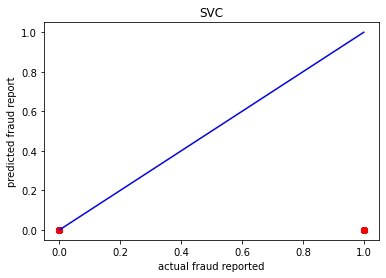

In [303]:
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual fraud reported')
plt.ylabel('predicted fraud report')
plt.title('SVC')

In [304]:
## evaluting the model

In [305]:
import numpy as np


In [306]:
a=np.array(y_test)

In [307]:
predicted=np.array(sv.predict(x_test))

In [310]:
df_com=pd.DataFrame({'true':a,'predicted':predicted},index=range(len(a)))
df_com.head()

,true,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [311]:
## saving the model

In [312]:
import pickle

In [313]:
filename='INSURANCE_CLAIM_FRAUD_DETECTION'

In [314]:
pickle.dump(svc,open(filename,'wb'))